# Car Accident Severity

### Introduction

In an effort to reduce the frequency of car collisions in a community, an algorithm must be developed to predict the severity of an accident given the current weather, road and visibility conditions. When conditions are bad, this model will alert drivers to remind them to be more careful.

### Importing data

In [47]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_3f22c3caf890482ca097e38b1e73b15c = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='aBniKFcqsRguYLuHOnvq59bezHMW5v1jLarK9cJqkZSX',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_3f22c3caf890482ca097e38b1e73b15c.get_object(Bucket='couseracapstone-donotdelete-pr-jhgybojamacxki',Key='Data-Collisions.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [5]:
list(df.columns)

['SEVERITYCODE',
 'X',
 'Y',
 'OBJECTID',
 'INCKEY',
 'COLDETKEY',
 'REPORTNO',
 'STATUS',
 'ADDRTYPE',
 'INTKEY',
 'LOCATION',
 'EXCEPTRSNCODE',
 'EXCEPTRSNDESC',
 'SEVERITYCODE.1',
 'SEVERITYDESC',
 'COLLISIONTYPE',
 'PERSONCOUNT',
 'PEDCOUNT',
 'PEDCYLCOUNT',
 'VEHCOUNT',
 'INCDATE',
 'INCDTTM',
 'JUNCTIONTYPE',
 'SDOT_COLCODE',
 'SDOT_COLDESC',
 'INATTENTIONIND',
 'UNDERINFL',
 'WEATHER',
 'ROADCOND',
 'LIGHTCOND',
 'PEDROWNOTGRNT',
 'SDOTCOLNUM',
 'SPEEDING',
 'ST_COLCODE',
 'ST_COLDESC',
 'SEGLANEKEY',
 'CROSSWALKKEY',
 'HITPARKEDCAR']

#### Deleting unwanted columns

In [52]:
df=df.drop(columns=['INTKEY','PEDROWNOTGRNT','SDOTCOLNUM','SPEEDING','OBJECTID','INCKEY','COLDETKEY',
 'REPORTNO','X','Y','SEGLANEKEY','CROSSWALKKEY','INATTENTIONIND','UNDERINFL','EXCEPTRSNCODE',
 'EXCEPTRSNDESC','SEVERITYCODE.1'])
df.head()

,SEVERITYCODE,STATUS,ADDRTYPE,LOCATION,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,...,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,ST_COLDESC,HITPARKEDCAR
0,2,Matched,Intersection,5TH AVE NE AND NE 103RD ST,Injury Collision,Angles,2,0,0,2,...,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Overcast,Wet,Daylight,10,Entering at angle,N
1,1,Matched,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Property Damage Only Collision,Sideswipe,2,0,0,2,...,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",Raining,Wet,Dark - Street Lights On,11,From same direction - both going straight - bo...,N
2,1,Matched,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Property Damage Only Collision,Parked Car,4,0,0,3,...,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Overcast,Dry,Daylight,32,One parked--one moving,N
3,1,Matched,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,Property Damage Only Collision,Other,3,0,0,3,...,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Dry,Daylight,23,From same direction - all others,N
4,2,Matched,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,Injury Collision,Angles,2,0,0,2,...,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Raining,Wet,Daylight,10,Entering at angle,N


In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

A=df.drop("SEVERITYCODE",axis=1)
B=df["SEVERITYCODE"]

### Feature selection

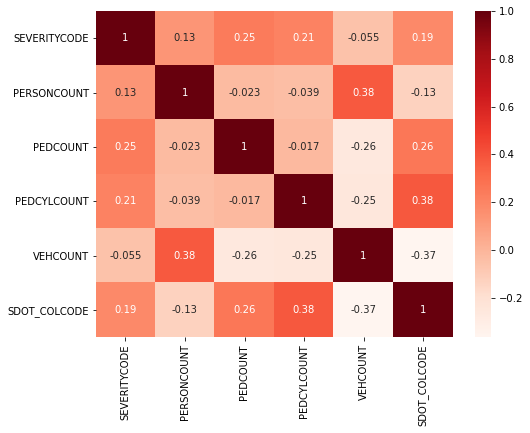

In [55]:
cor=df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(cor,annot=True,cmap=plt.cm.Reds)
plt.show()

In [9]:
cor_target=abs(cor["SEVERITYCODE"])
rel_features=cor_target[cor_target>0.5]
rel_features

SEVERITYCODE    1.0
Name: SEVERITYCODE, dtype: float64

From the heat map we understand that no two numerical columns have the corelation more than 0.5. So, we consider the categorical columns ("WEATHER,ROADCOND,LIGHTCOND") as the features.

In [10]:
features=df[["SEVERITYCODE","WEATHER","ROADCOND","LIGHTCOND"]]
features.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
0,2,Overcast,Wet,Daylight
1,1,Raining,Wet,Dark - Street Lights On
2,1,Overcast,Dry,Daylight
3,1,Clear,Dry,Daylight
4,2,Raining,Wet,Daylight


### Cleaning Data

In [11]:
features=features.dropna(axis=0,how='any')
features

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
0,2,Overcast,Wet,Daylight
1,1,Raining,Wet,Dark - Street Lights On
2,1,Overcast,Dry,Daylight
3,1,Clear,Dry,Daylight
4,2,Raining,Wet,Daylight
...,...,...,...,...
194668,2,Clear,Dry,Daylight
194669,1,Raining,Wet,Daylight
194670,2,Clear,Dry,Daylight
194671,2,Clear,Dry,Dusk


In [12]:
features=features.reset_index(drop=True)
features.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
0,2,Overcast,Wet,Daylight
1,1,Raining,Wet,Dark - Street Lights On
2,1,Overcast,Dry,Daylight
3,1,Clear,Dry,Daylight
4,2,Raining,Wet,Daylight


### Label Encoding

 The features are of type object, when they should be categorial type.We must use label encoding to covert the features to our desired data type.

In [13]:
features["WEATHER"]=features["WEATHER"].astype('category')
features["ROADCOND"]=features["ROADCOND"].astype('category')
features["LIGHTCOND"]=features["LIGHTCOND"].astype('category')
features.dtypes

SEVERITYCODE       int64
WEATHER         category
ROADCOND        category
LIGHTCOND       category
dtype: object

In [14]:
features["WEATHER_CAT"]=features["WEATHER"].cat.codes
features["ROADCOND_CAT"]=features["ROADCOND"].cat.codes
features["LIGHTCOND_CAT"]=features["LIGHTCOND"].cat.codes
features.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,WEATHER_CAT,ROADCOND_CAT,LIGHTCOND_CAT
0,2,Overcast,Wet,Daylight,4,8,5
1,1,Raining,Wet,Dark - Street Lights On,6,8,2
2,1,Overcast,Dry,Daylight,4,0,5
3,1,Clear,Dry,Daylight,1,0,5
4,2,Raining,Wet,Daylight,6,8,5


In [15]:
features["SEVERITYCODE"].value_counts()

1    132285
2     57052
Name: SEVERITYCODE, dtype: int64

Our target variable SEVERITYCODE is only 42% balanced. In fact, severitycode in class 1 is nearly three times the size of class 2.

We can fix this by downsampling the majority class.

### Balancing the Data

In [16]:
from sklearn.utils import resample
code_1=features[features.SEVERITYCODE==1].sample(n=57052,random_state=250)
code_2=features[features.SEVERITYCODE==2]

code_downsampled=pd.concat([code_1,code_2])
code_downsampled["SEVERITYCODE"].value_counts()

2    57052
1    57052
Name: SEVERITYCODE, dtype: int64

In [17]:
x=code_downsampled[["WEATHER_CAT","ROADCOND_CAT","LIGHTCOND_CAT"]].values
x[0:5]

array([[1, 0, 6],
       [4, 0, 5],
       [6, 8, 2],
       [4, 8, 2],
       [1, 0, 5]], dtype=int8)

In [18]:
y=code_downsampled[["SEVERITYCODE"]].values
y[0:5]

array([[1],
       [1],
       [1],
       [1],
       [1]])

In [19]:
y=y.ravel()
y

array([1, 1, 1, ..., 2, 2, 2])

### Normalize the Dataset

In [20]:
from sklearn import preprocessing
x=preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x[0:5]

array([[-0.71922718, -0.69302491,  1.00386646],
       [ 0.38796187, -0.69302491,  0.39484923],
       [ 1.12608791,  1.50501377, -1.43220246],
       [ 0.38796187,  1.50501377, -1.43220246],
       [-0.71922718, -0.69302491,  0.39484923]])

### Train and Test Split

We will use 30% of our data for testing and 70% for training.

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)
print("train data",x_train.shape,y_train.shape)
print("test data",x_test.shape,y_test.shape)

train data (79872, 3) (79872,)
test data (34232, 3) (34232,)


### K-Nearest Neighbors (KNN)

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score

Text(0, 0.5, 'Accuracy')

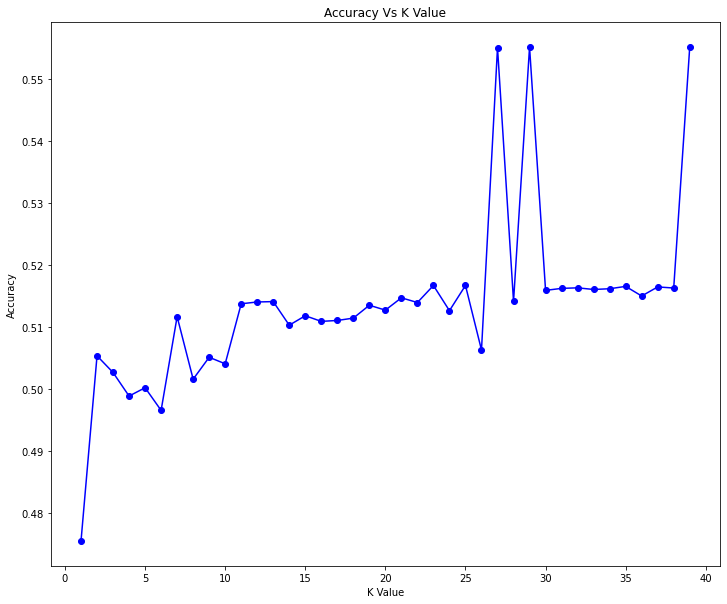

In [24]:
acc=[]
for i in range(1,40):
    neigh=KNeighborsClassifier(n_neighbors=i).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    acc.append(accuracy_score(y_test,yhat))

plt.figure(figsize=(12,10))
plt.plot(range(1,40),acc,color='blue',marker='o')
plt.title('Accuracy Vs K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [25]:
print("Maximum Accuracy",max(acc),"at k =",acc.index(max(acc))+1)

Maximum Accuracy 0.5551822855807431 at k = 39


In [30]:
k=39
neigh = KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)
pred_y=neigh.predict(x_test)
a_k=accuracy_score(y_test,pred_y)
j_k=jaccard_score(y_test, pred_y)
f1_k=f1_score(y_test, pred_y, average='weighted')
print("accuracy_score",a_k)
print("jaccard_score",j_k)
print("f1_score",f1_k)

accuracy_score 0.5551822855807431
jaccard_score 0.21639563606422396
f1_score 0.508039428734879


### Support Vector Machine (SVM)

In [34]:
from sklearn import svm
clf=svm.SVC(kernel='rbf')
clf.fit(x_train,y_train)
pred_y2=clf.predict(x_test)
a_s=accuracy_score(y_test,pred_y2)
j_s=jaccard_score(y_test, pred_y2)
f1_s=f1_score(y_test, pred_y2, average='weighted')
print("accuracy_score",a_s)
print("jaccard_score",j_s)
print("f1_score",f1_s)

accuracy_score 0.5644426267819584
jaccard_score 0.2687591956841589
f1_score 0.5367905000793085


### Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)
pred_y3 = LR.predict(x_test)

a_l=accuracy_score(y_test,pred_y3)
j_l=jaccard_score(y_test, pred_y3)
f1_l=f1_score(y_test, pred_y3, average='weighted')
print("accuracy_score",a_l)
print("jaccard_score",j_l)
print("f1_score",f1_l)

accuracy_score 0.5360773545220846
jaccard_score 0.289694963771357
f1_score 0.5242431492424555


In [49]:
from sklearn.metrics import log_loss
pred_y3_prob = LR.predict_proba(x_test)
print("LR LogLoss: %.2f" % log_loss(y_test, pred_y3_prob))

LR LogLoss: 0.68


In [35]:
Accuracy_Score=[a_k,a_s,a_l]
Jaccard_Score=[j_k,j_s,j_l]
F1_Score=[f1_k,f1_s,f1_l]


### Final Report

In [46]:

df1 = {'Algorithm': ['KNN', 'SVM', 'LR'],'Accuracy_Score':Accuracy_Score,'Jaccard_Score':Jaccard_Score,'F1_Score':F1_Score}
Report = pd.DataFrame(data=df1, columns=['Algorithm', 'Accuracy_Score', 'Jaccard_Score', 'F1_Score'], index=None)
ReportReport.set_index("Algorithm")
Report

,Accuracy_Score,Jaccard_Score,F1_Score
Algorithm,,,
KNN,0.555182,0.216396,0.508039
SVM,0.564443,0.268759,0.536791
LR,0.536077,0.289695,0.524243


### Conclusion

Based on historical data from weather conditions pointing to certain classes, we can conclude that particular weather conditions have a somewhat impact on whether or not travel could result in property damage (class 1) or injury (class 2).